In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd

tf.enable_eager_execution()

In [2]:
floor = ['1층', '2층', '3층', '4층']

In [3]:
for f in floor:
    path = r"C:/Users/YH/PycharmProjects/untitled/fflogs/에덴"+f+"/"
    file_list = os.listdir(path)
    
    user_info = pd.DataFrame(columns=['층','직업','DPS','RDPS','시간'])
    
    for file in file_list:
        dataset = pd.read_csv(path+file, engine='python', encoding='utf-8')
        for idx in range(0, len(dataset)):
            user_info.loc[len(user_info)] = [f, dataset.iloc[idx]['직업'], dataset.iloc[idx]['DPS'], dataset.iloc[idx]['RDPS'],dataset.iloc[idx]['시간']]
                
    user_info = user_info[user_info['직업'] != 'LimitBreak']
    
    print(r'C:\Users\YH\PycharmProjects\untitled\fflogs\preprocessing\dps\user_info_'+f+'.txt')
    user_info.to_csv(r'C:\Users\YH\PycharmProjects\untitled\fflogs\preprocessing\dps\user_info_'+f+'.txt', index=False, encoding='utf-8')

C:\Users\YH\PycharmProjects\untitled\fflogs\preprocessing\dps\user_info_1층.txt
C:\Users\YH\PycharmProjects\untitled\fflogs\preprocessing\dps\user_info_2층.txt
C:\Users\YH\PycharmProjects\untitled\fflogs\preprocessing\dps\user_info_3층.txt
C:\Users\YH\PycharmProjects\untitled\fflogs\preprocessing\dps\user_info_4층.txt


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

#한글 폰트 깨짐 현상에 대한 처리
mpl.rc('font', family='New Gulim')

In [6]:
#직업별 딜량 통계(box plot 사용)

In [7]:
#데이터 로드 및 DPS, RDPS의 타입 변경
def dps_and_rdps(floor):
    user_info = pd.DataFrame(columns=['층','직업', 'DPS', 'RDPS', '시간'])

    data = pd.read_csv(r'C:\Users\YH\PycharmProjects\untitled\fflogs\preprocessing\dps\user_info_'+floor+'.txt', engine='python', encoding='utf-8')
    user_info = user_info.append(data)
    
    #DPS와 RDPS는 float으로 가야하는데 실제로는 object
    #따라서, 변환이 필요
    user_info['DPS'] = user_info['DPS'].map(lambda x:x.replace(',',''))
    user_info['RDPS'] = user_info['RDPS'].map(lambda x:x.replace(',',''))
    
    user_info['DPS'] = user_info['DPS'].astype(float)
    user_info['RDPS'] = user_info['RDPS'].astype(float)
    
    return user_info

In [8]:
#층별 데이터 로드
user_info1 = dps_and_rdps(floor[0])
user_info2 = dps_and_rdps(floor[1])
user_info3 = dps_and_rdps(floor[2])
user_info4 = dps_and_rdps(floor[3])

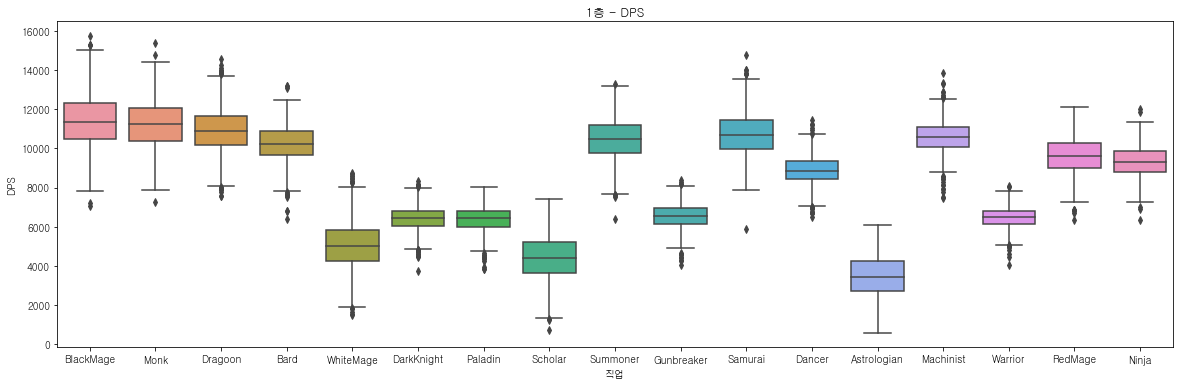

In [9]:
#1층
plt.figure(figsize=(20, 6))
plt.title('1층 - DPS')
sns.boxplot(x='직업',y='DPS',data=user_info1)

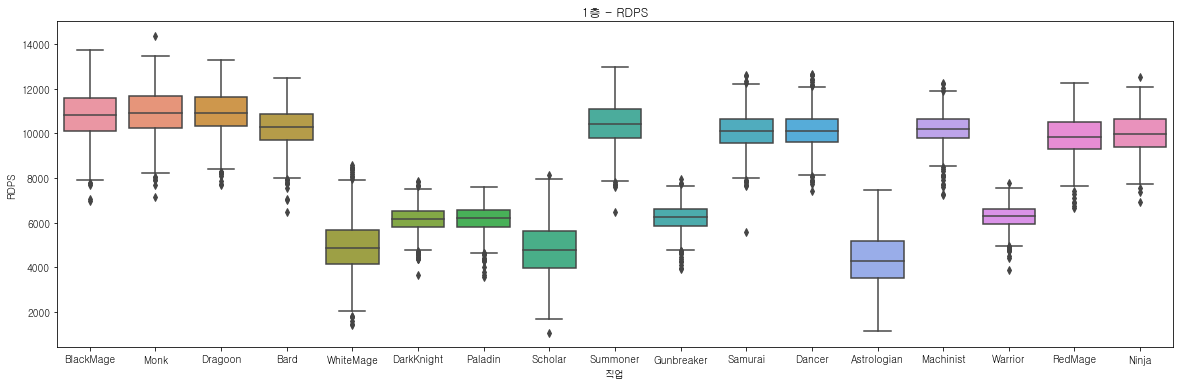

In [10]:
plt.figure(figsize=(20, 6))
plt.title('1층 - RDPS')
sns.boxplot(x='직업',y='RDPS',data=user_info1)

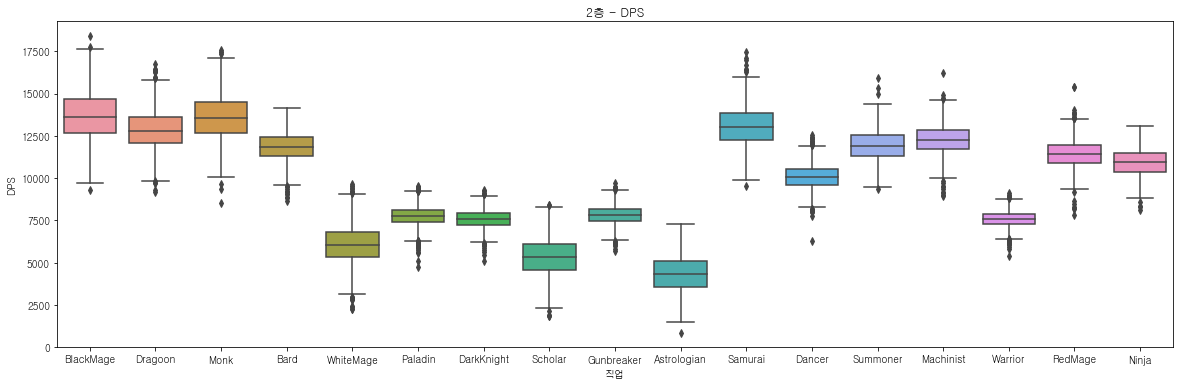

In [11]:
#2층
plt.figure(figsize=(20, 6))
plt.title('2층 - DPS')
sns.boxplot(x='직업',y='DPS',data=user_info2)

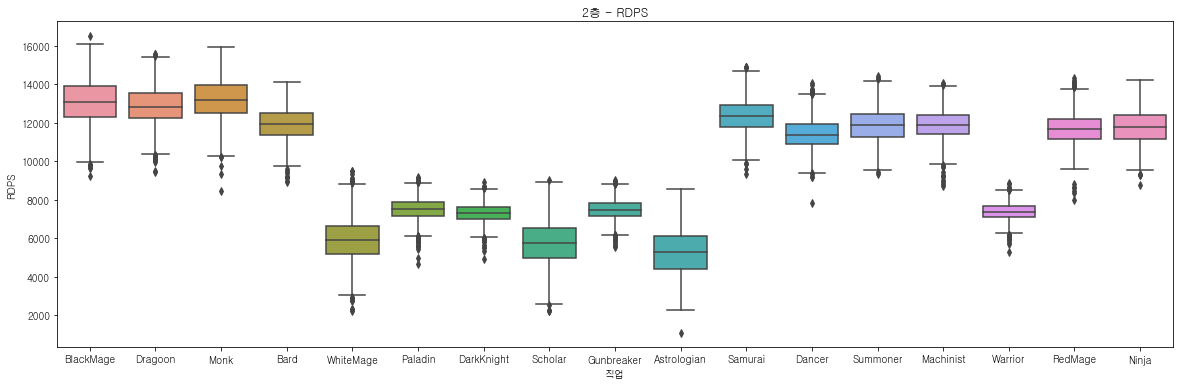

In [12]:
plt.figure(figsize=(20, 6))
plt.title('2층 - RDPS')
sns.boxplot(x='직업',y='RDPS',data=user_info2)

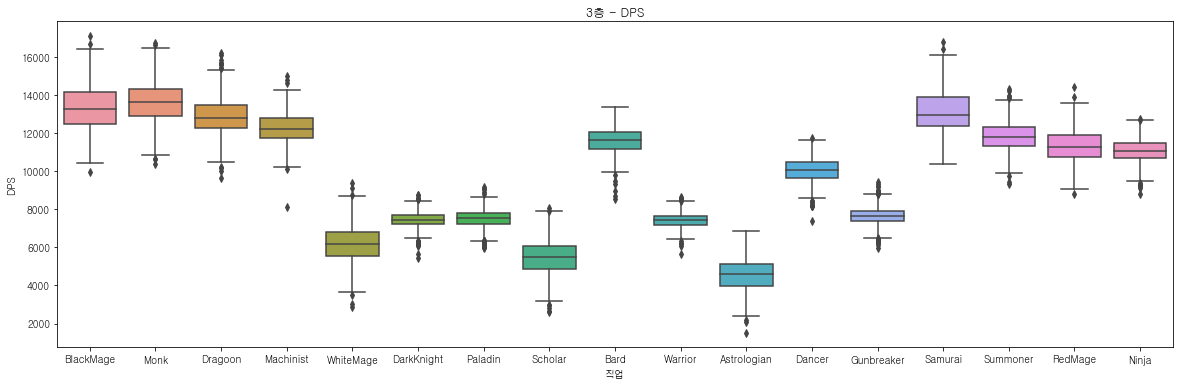

In [13]:
#3층
plt.figure(figsize=(20, 6))
plt.title('3층 - DPS')
sns.boxplot(x='직업',y='DPS',data=user_info3)

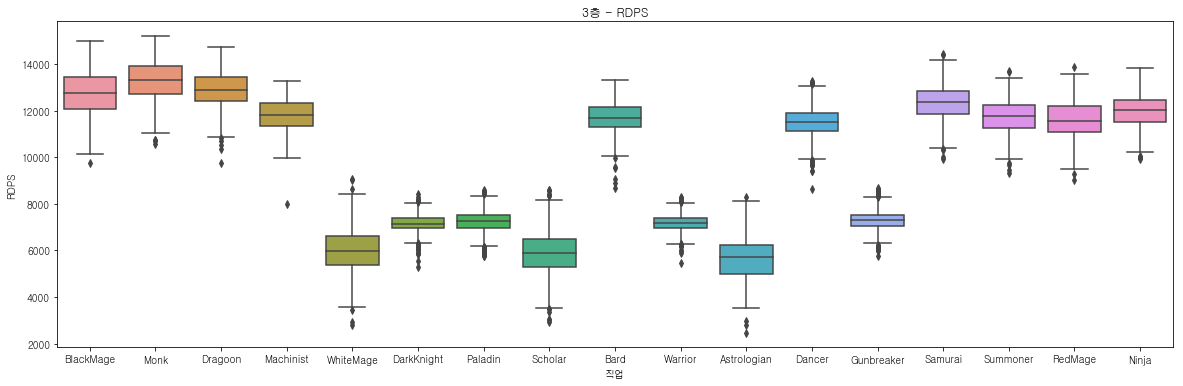

In [14]:
plt.figure(figsize=(20, 6))
plt.title('3층 - RDPS')
sns.boxplot(x='직업',y='RDPS',data=user_info3)

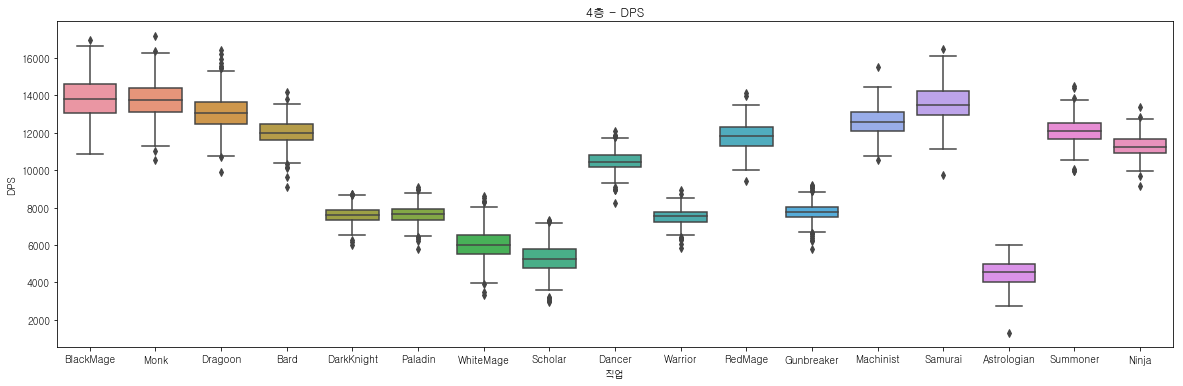

In [15]:
#4층
plt.figure(figsize=(20, 6))
plt.title('4층 - DPS')
sns.boxplot(x='직업',y='DPS',data=user_info4)

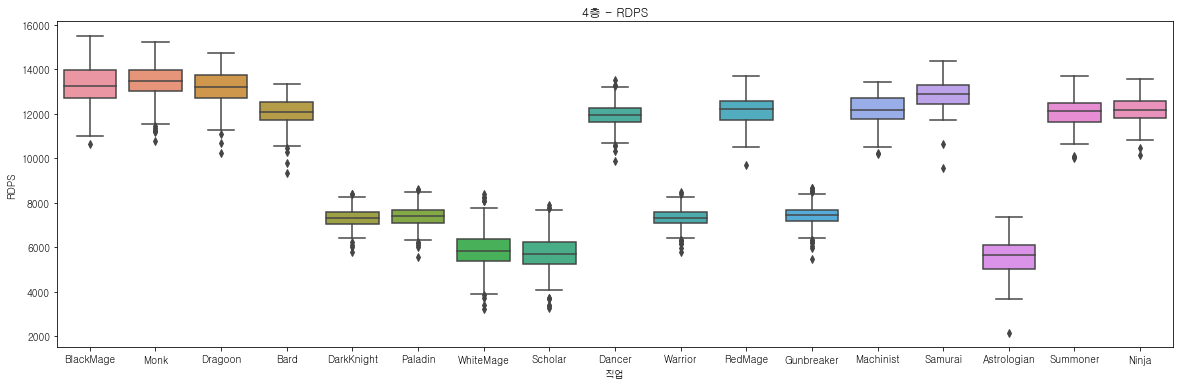

In [16]:
plt.figure(figsize=(20, 6))
plt.title('4층 - RDPS')
sns.boxplot(x='직업',y='RDPS',data=user_info4)

In [17]:
#층 / 직업별 dps 통계량
pd.options.display.float_format = '{:.0f}'.format

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

job = list(user_info1['직업'].unique())

In [18]:
job_1 = pd.DataFrame(columns=[job])
job_2 = pd.DataFrame(columns=[job])
job_3 = pd.DataFrame(columns=[job])
job_4 = pd.DataFrame(columns=[job])

In [19]:
#1층

job_1 = pd.DataFrame()
for j in job:
    part_of_job = user_info1[user_info1['직업'] == j]
    part_of_job[j] = part_of_job['DPS']
    job_1 = pd.concat([job_1, part_of_job[j]],axis=1,sort=False) 
job_1.describe()

c:\users\yh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BlackMage,Monk,Dragoon,Bard,WhiteMage,DarkKnight,Paladin,Scholar,Summoner,Gunbreaker,Samurai,Dancer,Astrologian,Machinist,Warrior,RedMage,Ninja
count,1101,1224,1780,1128,2186,1125,1509,2085,834,1309,761,1123,623,766,951,649,422
mean,11399,11259,10920,10254,5044,6408,6401,4386,10458,6519,10734,8875,3456,10597,6442,9625,9322
std,1335,1207,1060,937,1149,616,628,1118,1022,625,1109,747,1079,856,549,986,817
min,7077,7253,7572,6409,1482,3710,3840,708,6399,4054,5898,6509,580,7447,4064,6360,6335
25%,10458,10371,10189,9664,4243,6028,5993,3638,9782,6118,9979,8422,2709,10090,6111,8997,8800
50%,11355,11240,10880,10228,5019,6426,6454,4372,10459,6543,10679,8854,3414,10606,6493,9604,9317
75%,12311,12091,11635,10894,5828,6816,6818,5200,11197,6936,11474,9346,4221,11073,6811,10255,9855
max,15744,15380,14564,13183,8721,8320,8014,7424,13319,8394,14784,11455,6100,13845,8081,12102,12006


In [20]:
#2층

job_2 = pd.DataFrame()
for j in job:
    part_of_job = user_info2[user_info2['직업'] == j]
    part_of_job[j] = part_of_job['DPS']
    job_2 = pd.concat([job_2, part_of_job[j]],axis=1,sort=False) 
job_2.describe()

c:\users\yh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BlackMage,Monk,Dragoon,Bard,WhiteMage,DarkKnight,Paladin,Scholar,Summoner,Gunbreaker,Samurai,Dancer,Astrologian,Machinist,Warrior,RedMage,Ninja
count,981,1187,1705,1089,2013,1022,1420,1991,750,1212,653,958,502,700,852,614,375
mean,13671,13577,12842,11874,6065,7580,7752,5332,11926,7811,13075,10101,4331,12298,7574,11440,10913
std,1458,1336,1135,905,1165,571,604,1095,983,597,1212,752,1145,974,505,967,889
min,9287,8546,9174,8670,2270,5074,4743,1823,9374,5670,9526,6298,862,8962,5387,7816,8115
25%,12678,12686,12103,11281,5307,7232,7400,4577,11280,7440,12244,9602,3537,11693,7291,10875,10350
50%,13636,13546,12763,11837,6049,7585,7780,5356,11884,7799,13026,10082,4342,12257,7588,11402,10949
75%,14677,14503,13614,12450,6812,7944,8136,6099,12544,8185,13845,10532,5125,12860,7891,11935,11491
max,18397,17571,16746,14160,9674,9311,9557,8422,15913,9722,17432,12551,7300,16206,9106,15380,13107


In [21]:
#3층

job_3 = pd.DataFrame()
for j in job:
    part_of_job = user_info3[user_info3['직업'] == j]
    part_of_job[j] = part_of_job['DPS']
    job_3 = pd.concat([job_3, part_of_job[j]],axis=1,sort=False) 
job_3.describe()

c:\users\yh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BlackMage,Monk,Dragoon,Bard,WhiteMage,DarkKnight,Paladin,Scholar,Summoner,Gunbreaker,Samurai,Dancer,Astrologian,Machinist,Warrior,RedMage,Ninja
count,655,937,1243,770,1365,695,1058,1428,555,816,355,599,331,470,555,391,273
mean,13305,13638,12849,11612,6179,7448,7498,5474,11812,7642,13085,10044,4570,12221,7406,11278,11031
std,1208,1037,927,704,934,432,486,859,828,503,1142,640,892,822,417,842,704
min,9961,10387,9623,8561,2893,5423,5986,2633,9348,5941,10391,7385,1526,8114,5669,8820,8820
25%,12484,12892,12234,11174,5550,7199,7219,4867,11312,7356,12354,9650,3973,11735,7148,10724,10661
50%,13255,13618,12774,11611,6162,7441,7548,5481,11804,7643,12965,10081,4609,12193,7414,11249,11052
75%,14133,14310,13474,12063,6824,7711,7804,6081,12297,7928,13881,10450,5151,12782,7662,11869,11477
max,17078,16711,16169,13371,9351,8768,9171,8046,14321,9412,16753,11715,6833,14997,8629,14406,12717


In [22]:
#4층

job_4 = pd.DataFrame()
for j in job:
    part_of_job = user_info4[user_info4['직업'] == j]
    part_of_job[j] = part_of_job['DPS']
    job_4 = pd.concat([job_4, part_of_job[j]],axis=1,sort=False) 
job_4.describe()

c:\users\yh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BlackMage,Monk,Dragoon,Bard,WhiteMage,DarkKnight,Paladin,Scholar,Summoner,Gunbreaker,Samurai,Dancer,Astrologian,Machinist,Warrior,RedMage,Ninja
count,396,579,756,490,809,391,664,842,308,431,152,274,123,243,288,210,140
mean,13860,13781,13084,12022,6013,7599,7630,5274,12112,7764,13598,10476,4469,12607,7515,11797,11294
std,1105,993,869,642,787,438,447,742,695,483,989,555,725,736,436,709,645
min,10843,10556,9925,9078,3341,5980,5760,2930,9951,5768,9733,8264,1313,10547,5865,9440,9164
25%,13048,13127,12498,11614,5509,7328,7341,4792,11671,7501,12952,10166,4022,12123,7252,11307,10924
50%,13793,13737,13074,11988,6002,7588,7634,5249,12103,7772,13508,10445,4553,12581,7534,11846,11248
75%,14597,14390,13653,12470,6532,7861,7918,5767,12523,8044,14248,10797,4975,13139,7792,12291,11689
max,16983,17174,16417,14186,8602,8745,9081,7313,14523,9207,16506,12118,6012,15514,8925,14105,13382


In [23]:
#RDPS

In [24]:
#1층

job_1 = pd.DataFrame()
for j in job:
    part_of_job = user_info1[user_info1['직업'] == j]
    part_of_job[j] = part_of_job['RDPS']
    job_1 = pd.concat([job_1, part_of_job[j]],axis=1,sort=False) 
job_1.describe()

c:\users\yh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BlackMage,Monk,Dragoon,Bard,WhiteMage,DarkKnight,Paladin,Scholar,Summoner,Gunbreaker,Samurai,Dancer,Astrologian,Machinist,Warrior,RedMage,Ninja
count,1101,1224,1780,1128,2186,1125,1509,2085,834,1309,761,1123,623,766,951,649,422
mean,10830,10944,10960,10284,4905,6155,6169,4780,10407,6214,10110,10137,4343,10214,6241,9886,9995
std,1104,1014,953,889,1119,567,595,1162,966,565,866,799,1225,749,515,992,866
min,6984,7161,7703,6462,1405,3650,3542,1070,6479,3903,5600,7424,1146,7234,3882,6674,6914
25%,10086,10247,10326,9723,4125,5807,5790,3978,9783,5858,9569,9622,3505,9776,5938,9292,9402
50%,10816,10916,10926,10286,4881,6180,6225,4765,10435,6258,10095,10108,4258,10217,6302,9850,9960
75%,11598,11674,11622,10884,5663,6527,6563,5627,11076,6592,10648,10626,5189,10629,6593,10524,10632
max,13726,14360,13281,12492,8575,7878,7601,8117,12978,7975,12604,12678,7475,12268,7757,12273,12550


In [26]:
#2층

job_2 = pd.DataFrame()
for j in job:
    part_of_job = user_info2[user_info2['직업'] == j]
    part_of_job[j] = part_of_job['RDPS']
    job_2 = pd.concat([job_2, part_of_job[j]],axis=1,sort=False) 
job_2.describe()

c:\users\yh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BlackMage,Monk,Dragoon,Bard,WhiteMage,DarkKnight,Paladin,Scholar,Summoner,Gunbreaker,Samurai,Dancer,Astrologian,Machinist,Warrior,RedMage,Ninja
count,981,1187,1705,1089,2013,1022,1420,1991,750,1212,653,958,502,700,852,614,375
mean,13086,13217,12896,11950,5909,7310,7503,5741,11877,7487,12371,11470,5290,11920,7366,11714,11771
std,1211,1119,1017,865,1135,521,571,1124,917,531,952,820,1265,878,474,949,943
min,9216,8478,9448,8907,2205,4910,4681,2220,9318,5541,9325,7835,1096,8730,5305,7988,8793
25%,12306,12486,12266,11383,5164,7008,7167,4963,11271,7161,11758,10922,4409,11400,7098,11151,11184
50%,13070,13191,12835,11916,5887,7309,7538,5738,11861,7487,12364,11385,5271,11894,7381,11664,11798
75%,13904,13974,13537,12486,6645,7643,7867,6548,12475,7817,12939,11946,6135,12425,7659,12211,12408
max,16506,15957,15568,14110,9503,8933,9194,9043,14443,9024,14917,14075,8581,14092,8897,14345,14227


In [27]:
#3층

job_3 = pd.DataFrame()
for j in job:
    part_of_job = user_info3[user_info3['직업'] == j]
    part_of_job[j] = part_of_job['RDPS']
    job_3 = pd.concat([job_3, part_of_job[j]],axis=1,sort=False) 
job_3.describe()

c:\users\yh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BlackMage,Monk,Dragoon,Bard,WhiteMage,DarkKnight,Paladin,Scholar,Summoner,Gunbreaker,Samurai,Dancer,Astrologian,Machinist,Warrior,RedMage,Ninja
count,655,937,1243,770,1365,695,1058,1428,555,816,355,599,331,470,555,391,273
mean,12721,13284,12913,11703,5996,7153,7234,5898,11749,7293,12342,11500,5649,11800,7176,11578,11973
std,979,797,758,666,905,390,460,873,766,445,819,657,982,716,385,830,729
min,9748,10566,9765,8673,2799,5276,5758,2932,9342,5748,9931,8624,2474,7973,5457,9021,9942
25%,12059,12731,12414,11309,5382,6954,6981,5304,11273,7028,11857,11112,4990,11342,6952,11060,11515
50%,12744,13302,12890,11699,5973,7154,7274,5893,11751,7306,12362,11525,5715,11807,7191,11541,12039
75%,13420,13910,13446,12163,6608,7388,7530,6488,12224,7531,12856,11914,6252,12308,7399,12188,12456
max,14983,15195,14742,13309,9058,8423,8574,8608,13718,8688,14414,13266,8296,13281,8277,13883,13840


In [28]:
#4층

job_4 = pd.DataFrame()
for j in job:
    part_of_job = user_info4[user_info4['직업'] == j]
    part_of_job[j] = part_of_job['RDPS']
    job_4 = pd.concat([job_4, part_of_job[j]],axis=1,sort=False) 
job_4.describe()

c:\users\yh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BlackMage,Monk,Dragoon,Bard,WhiteMage,DarkKnight,Paladin,Scholar,Summoner,Gunbreaker,Samurai,Dancer,Astrologian,Machinist,Warrior,RedMage,Ninja
count,396,579,756,490,809,391,664,842,308,431,152,274,123,243,288,210,140
mean,13284,13446,13189,12100,5850,7323,7380,5739,12093,7428,12882,11963,5583,12184,7305,12151,12166
std,852,733,715,594,770,402,428,745,632,441,673,549,804,634,401,657,607
min,10637,10760,10229,9350,3217,5804,5561,3278,9995,5487,9584,9895,2156,10211,5780,9705,10141
25%,12708,13010,12730,11722,5356,7055,7104,5260,11648,7184,12438,11641,5039,11787,7083,11705,11809
50%,13256,13466,13213,12066,5844,7324,7384,5703,12126,7458,12897,11965,5665,12163,7327,12218,12176
75%,13963,13988,13733,12540,6362,7579,7680,6236,12473,7688,13286,12282,6110,12712,7567,12572,12557
max,15496,15231,14755,13339,8398,8389,8612,7919,13690,8681,14367,13506,7373,13430,8474,13688,13575
